In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.linalg import inv

In [31]:
df = pd.read_csv('hopper_jump_27_kp.csv')

In [91]:
t = np.zeros((df.shape[0], 1))
for i in range(1, df.shape[0]):
    t[i] = t[i - 1]  + df.loc[i, "h_dt"]
df["t" ] = t

In [41]:
df.head()

,k,q1,q2,qdot1,qdot2,torque,Fr,h_dt,t
0,0,0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
1,1,0.477255,-0.477255,-0.454909,0.454909,-12.657253,22.467253,0.05,0.05
2,2,0.429509,-0.429509,-0.954909,0.954909,-9.050008,18.860008,0.05,0.10
3,3,0.354509,-0.354509,-1.500000,1.500000,-5.442747,15.252747,0.05,0.15
4,4,0.250000,-0.250000,-2.090182,2.090182,-1.835470,11.645470,0.05,0.20


In [85]:
test = np.transpose(np.concatenate([df.loc[0:1, "q1"].values, df.loc[0:1, "qdot1"].values]))
print(test.shape)

(4,)


In [124]:
fitParam = np.zeros([df.shape[0] - 1, 4])
for i in range (1, df.shape[0]):
    M = np.array([[t[i-1, 0]*t[i-1, 0]*t[i-1, 0], t[i-1, 0]*t[i-1, 0], t[i-1, 0], 1], [t[i, 0]*t[i, 0]*t[i, 0], t[i, 0]*t[i, 0], t[i, 0], 1], [3*t[i-1, 0]*t[i-1, 0], 2*t[i-1, 0], 1, 0], [3*t[i, 0]*t[i, 0], 2*t[i, 0], 1, 0]])
    fitParam[i -1] = np.dot(inv(M),np.concatenate([df.loc[i-1:i, "q1"].values, df.loc[i-1:i, "qdot1"].values]))

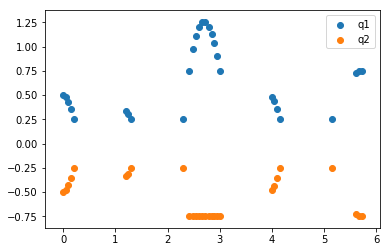

In [39]:
plt.scatter('t', 'q1', data = df)
plt.scatter('t', 'q2', data = df)
plt.legend()

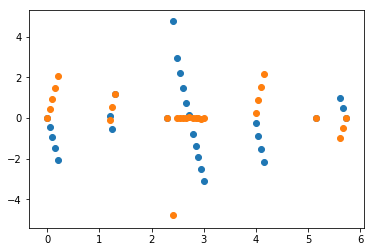

In [38]:
plt.scatter('t', 'qdot1', data = df)
plt.scatter('t', 'qdot2', data = df)